## Importamos librerías

In [ ]:
# Manipulación de datos

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para clasificadores

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # Support Vector Classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import GaussianNB


# Otras librerías

from sklearn.model_selection import train_test_split, RepeatedKFold, RepeatedStratifiedKFold, GridSearchCV, cross_val_score # for splitting the data into train and test samples
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # for model evaluation metrics
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from tabulate import tabulate

# MLP
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping

## Conectar con Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cargamos los datos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UAX/4º/TFG/TFG/Código /transactions_cleaned.csv')
df.head()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,currentBalance,isFraud,CVV_match,transactionYear,transactionMonth,...,acqCountry_PR,acqCountry_US,expirationDateKeyInMatch_False,expirationDateKeyInMatch_True,cardPresent_False,cardPresent_True,transactionType_ADDRESS_VERIFICATION,transactionType_Información no disponible,transactionType_PURCHASE,transactionType_REVERSAL
0,5000,5000.0,98.55,2.0,1.0,0.0,0,1,2016,8,...,0,1,1,0,1,0,0,0,1,0
1,5000,5000.0,74.51,9.0,1.0,0.0,0,1,2016,10,...,0,1,1,0,0,1,0,0,1,0
2,5000,5000.0,7.47,9.0,1.0,0.0,0,1,2016,11,...,0,1,1,0,1,0,0,0,1,0
3,5000,5000.0,7.47,9.0,1.0,0.0,0,1,2016,12,...,0,1,1,0,1,0,0,0,1,0
4,5000,5000.0,71.18,2.0,1.0,0.0,0,1,2016,3,...,0,1,1,0,0,1,0,0,1,0


# Correlación entre variables

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

# Correlation with the target variable
correlation_with_target = correlation_matrix['isFraud'].sort_values(ascending=False)

# Display correlation values
print(correlation_with_target)

isFraud                               1.000000
transactionAmount                     0.075026
cardPresent_False                     0.042642
Fresh Flowers                         0.041208
merchantCategoryCode_online_retail    0.040283
                                        ...   
merchantCategoryCode_mobileapps      -0.017465
merchantCategoryCode_fastfood        -0.020093
merchantCategoryCode_fuel            -0.022197
cardPresent_True                     -0.042642
transactionYear                            NaN
Name: isFraud, Length: 104, dtype: float64


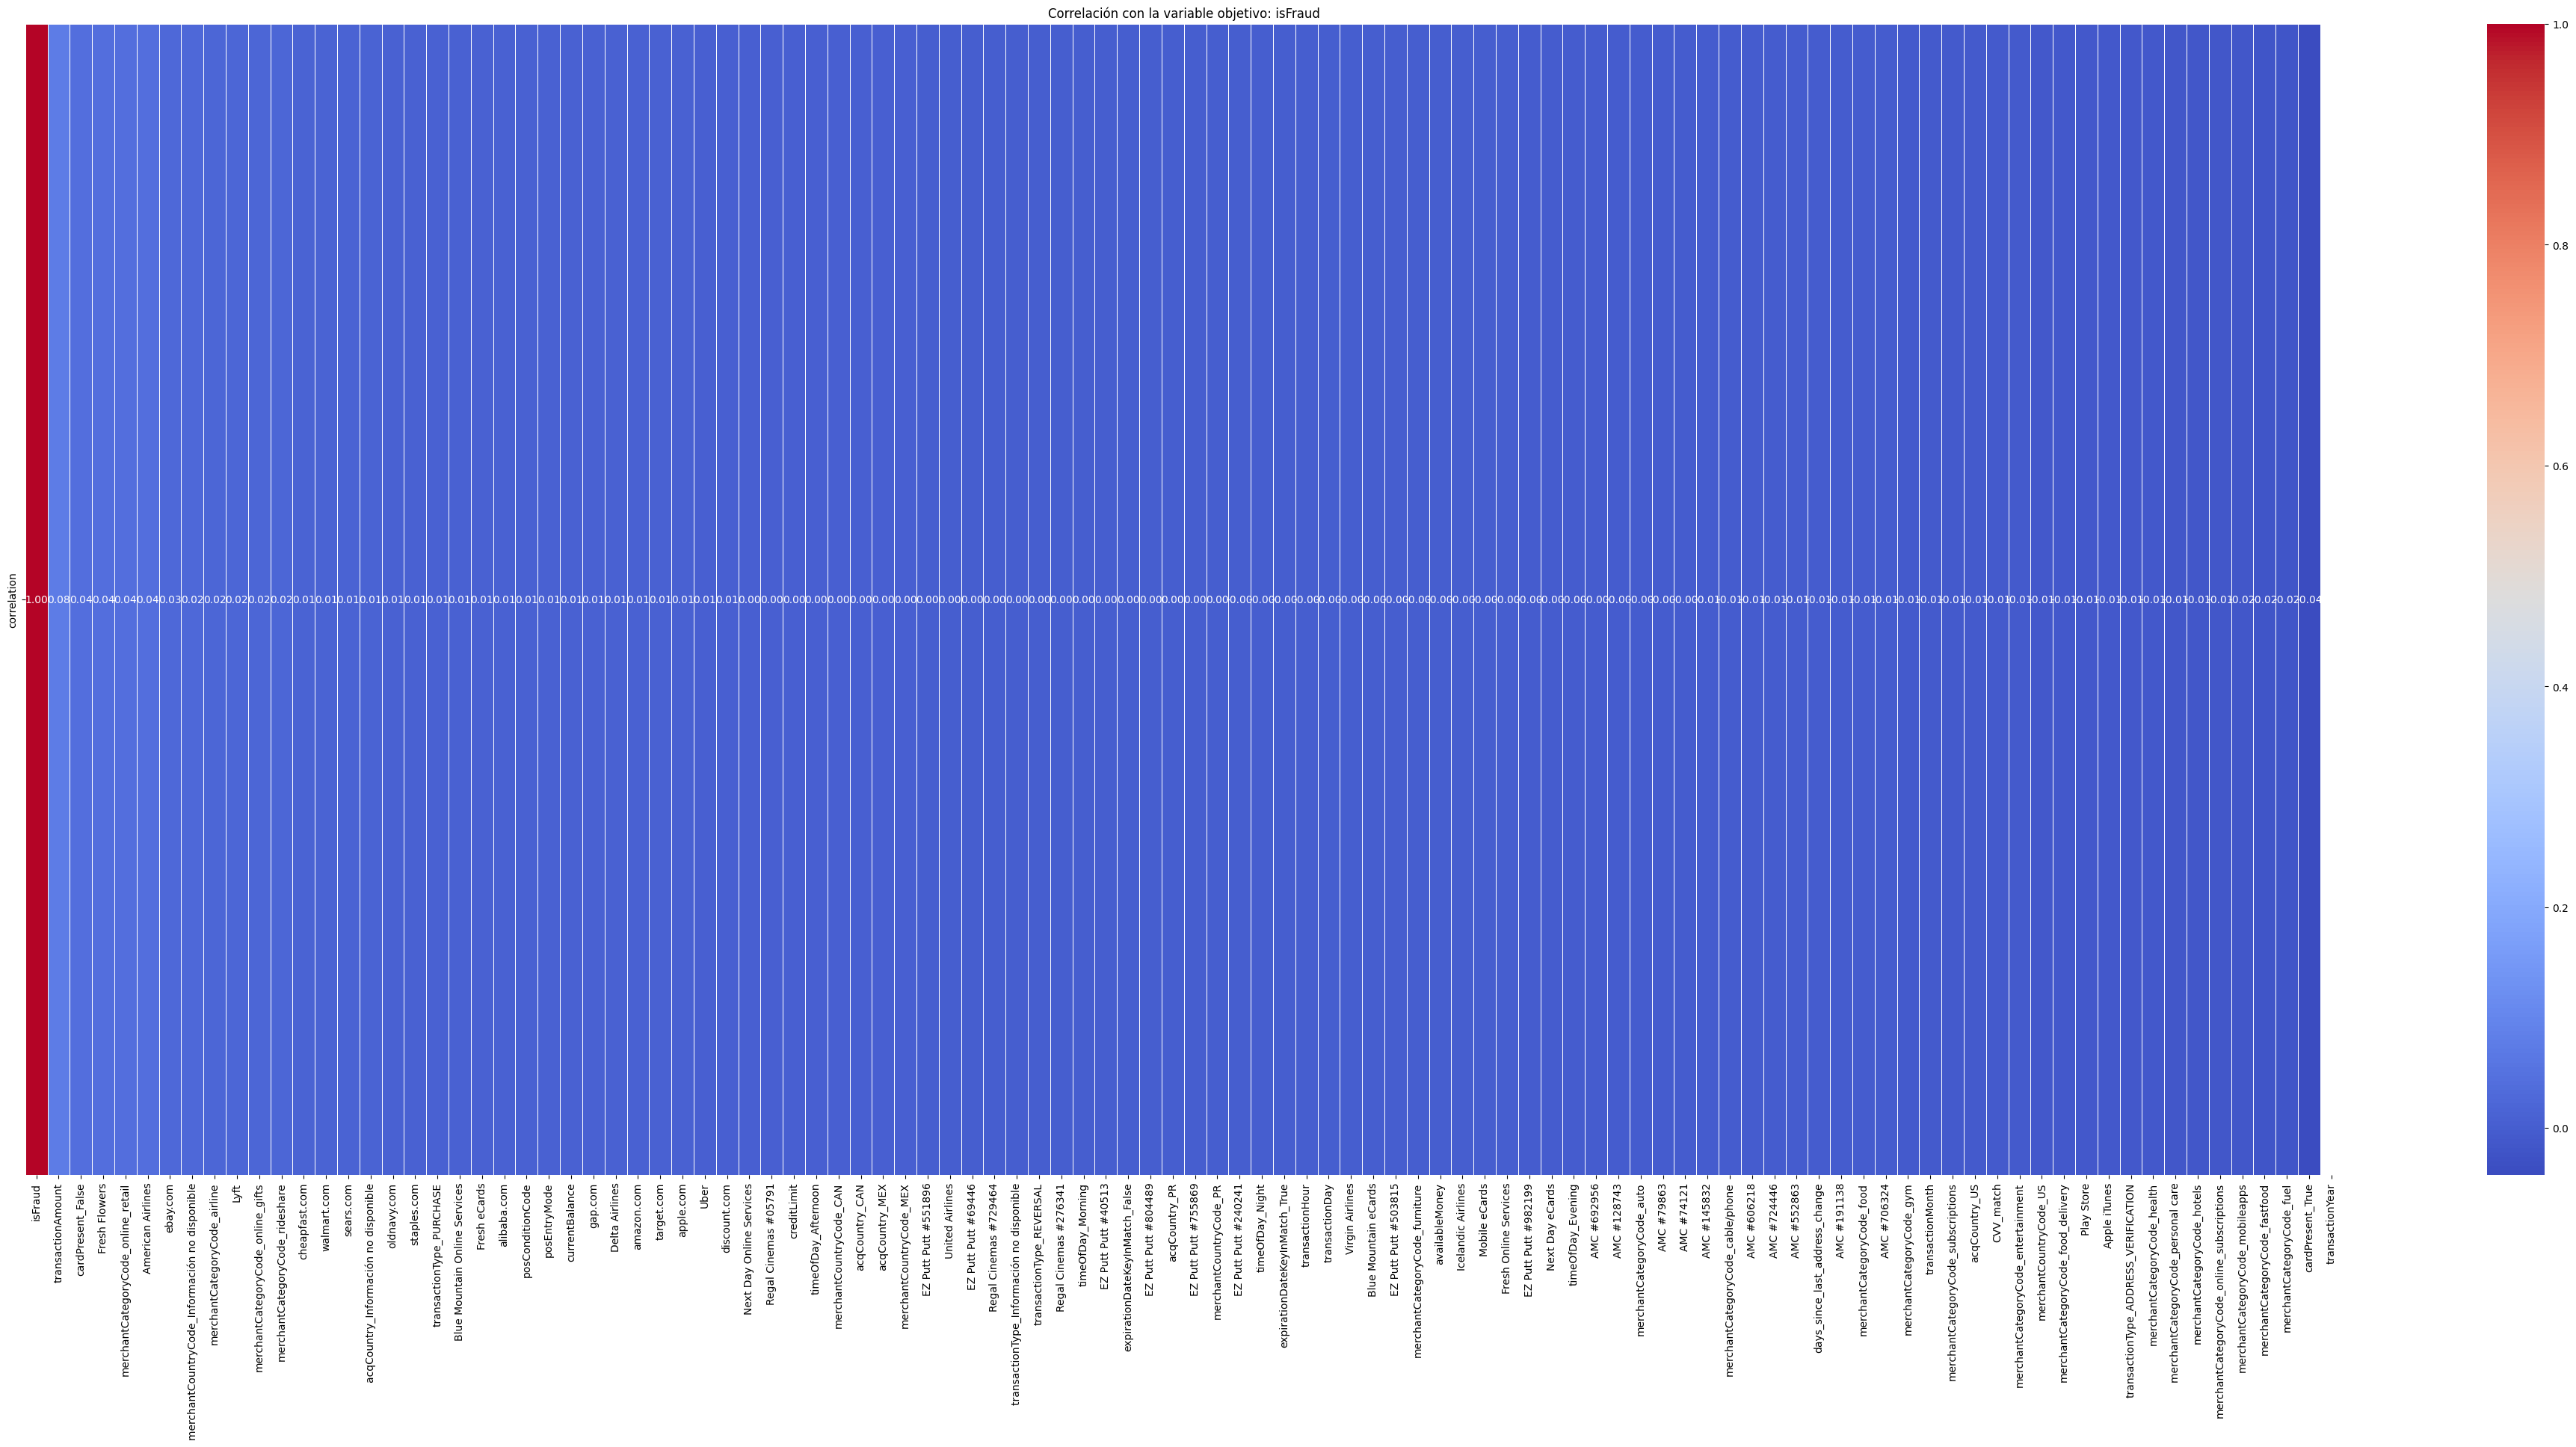

In [ ]:
plt.figure(figsize=(50, 20))
sns.heatmap(correlation_with_target.to_frame('correlation').transpose(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlación con la variable objetivo: isFraud')
plt.show()

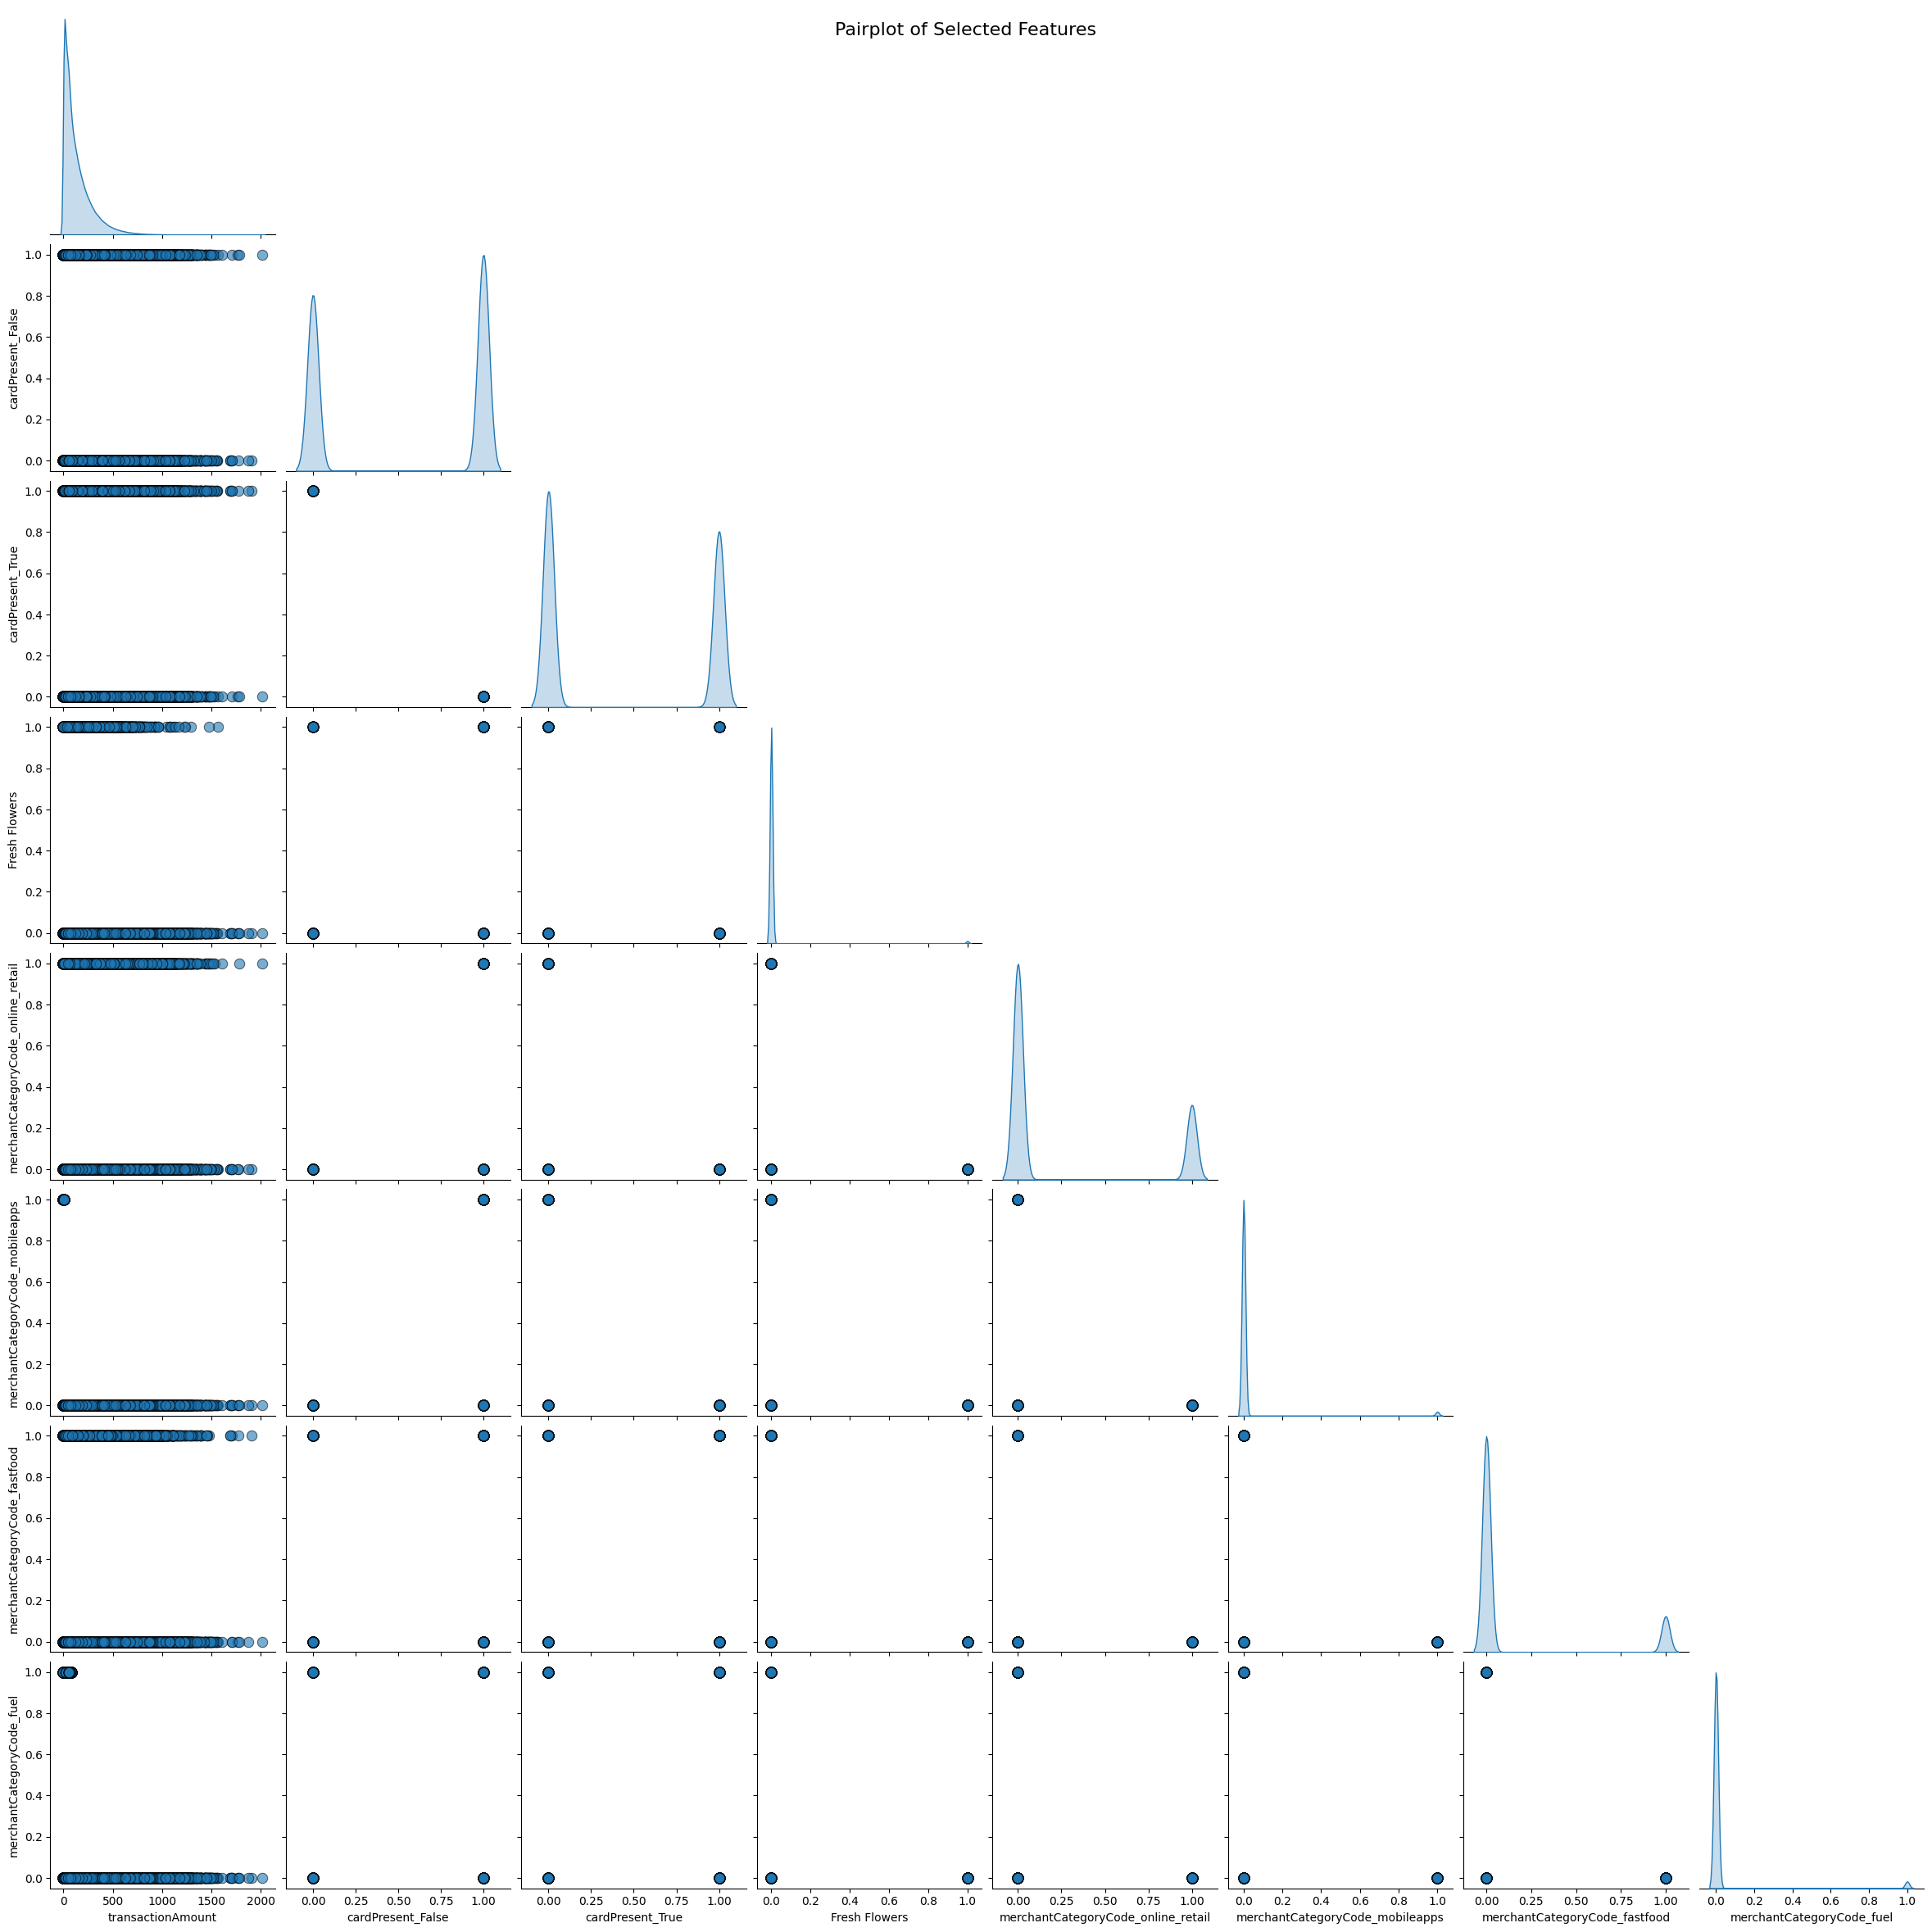

In [ ]:
# Seleccionamos solo algunas columnas para el pairplot por claridad
# Asegúrate de incluir solo columnas numéricas relevantes
columns = ['transactionAmount', 'cardPresent_False', 'cardPresent_True', 'Fresh Flowers',
           'merchantCategoryCode_online_retail', 'merchantCategoryCode_mobileapps',
           'merchantCategoryCode_fastfood', 'merchantCategoryCode_fuel']




In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])


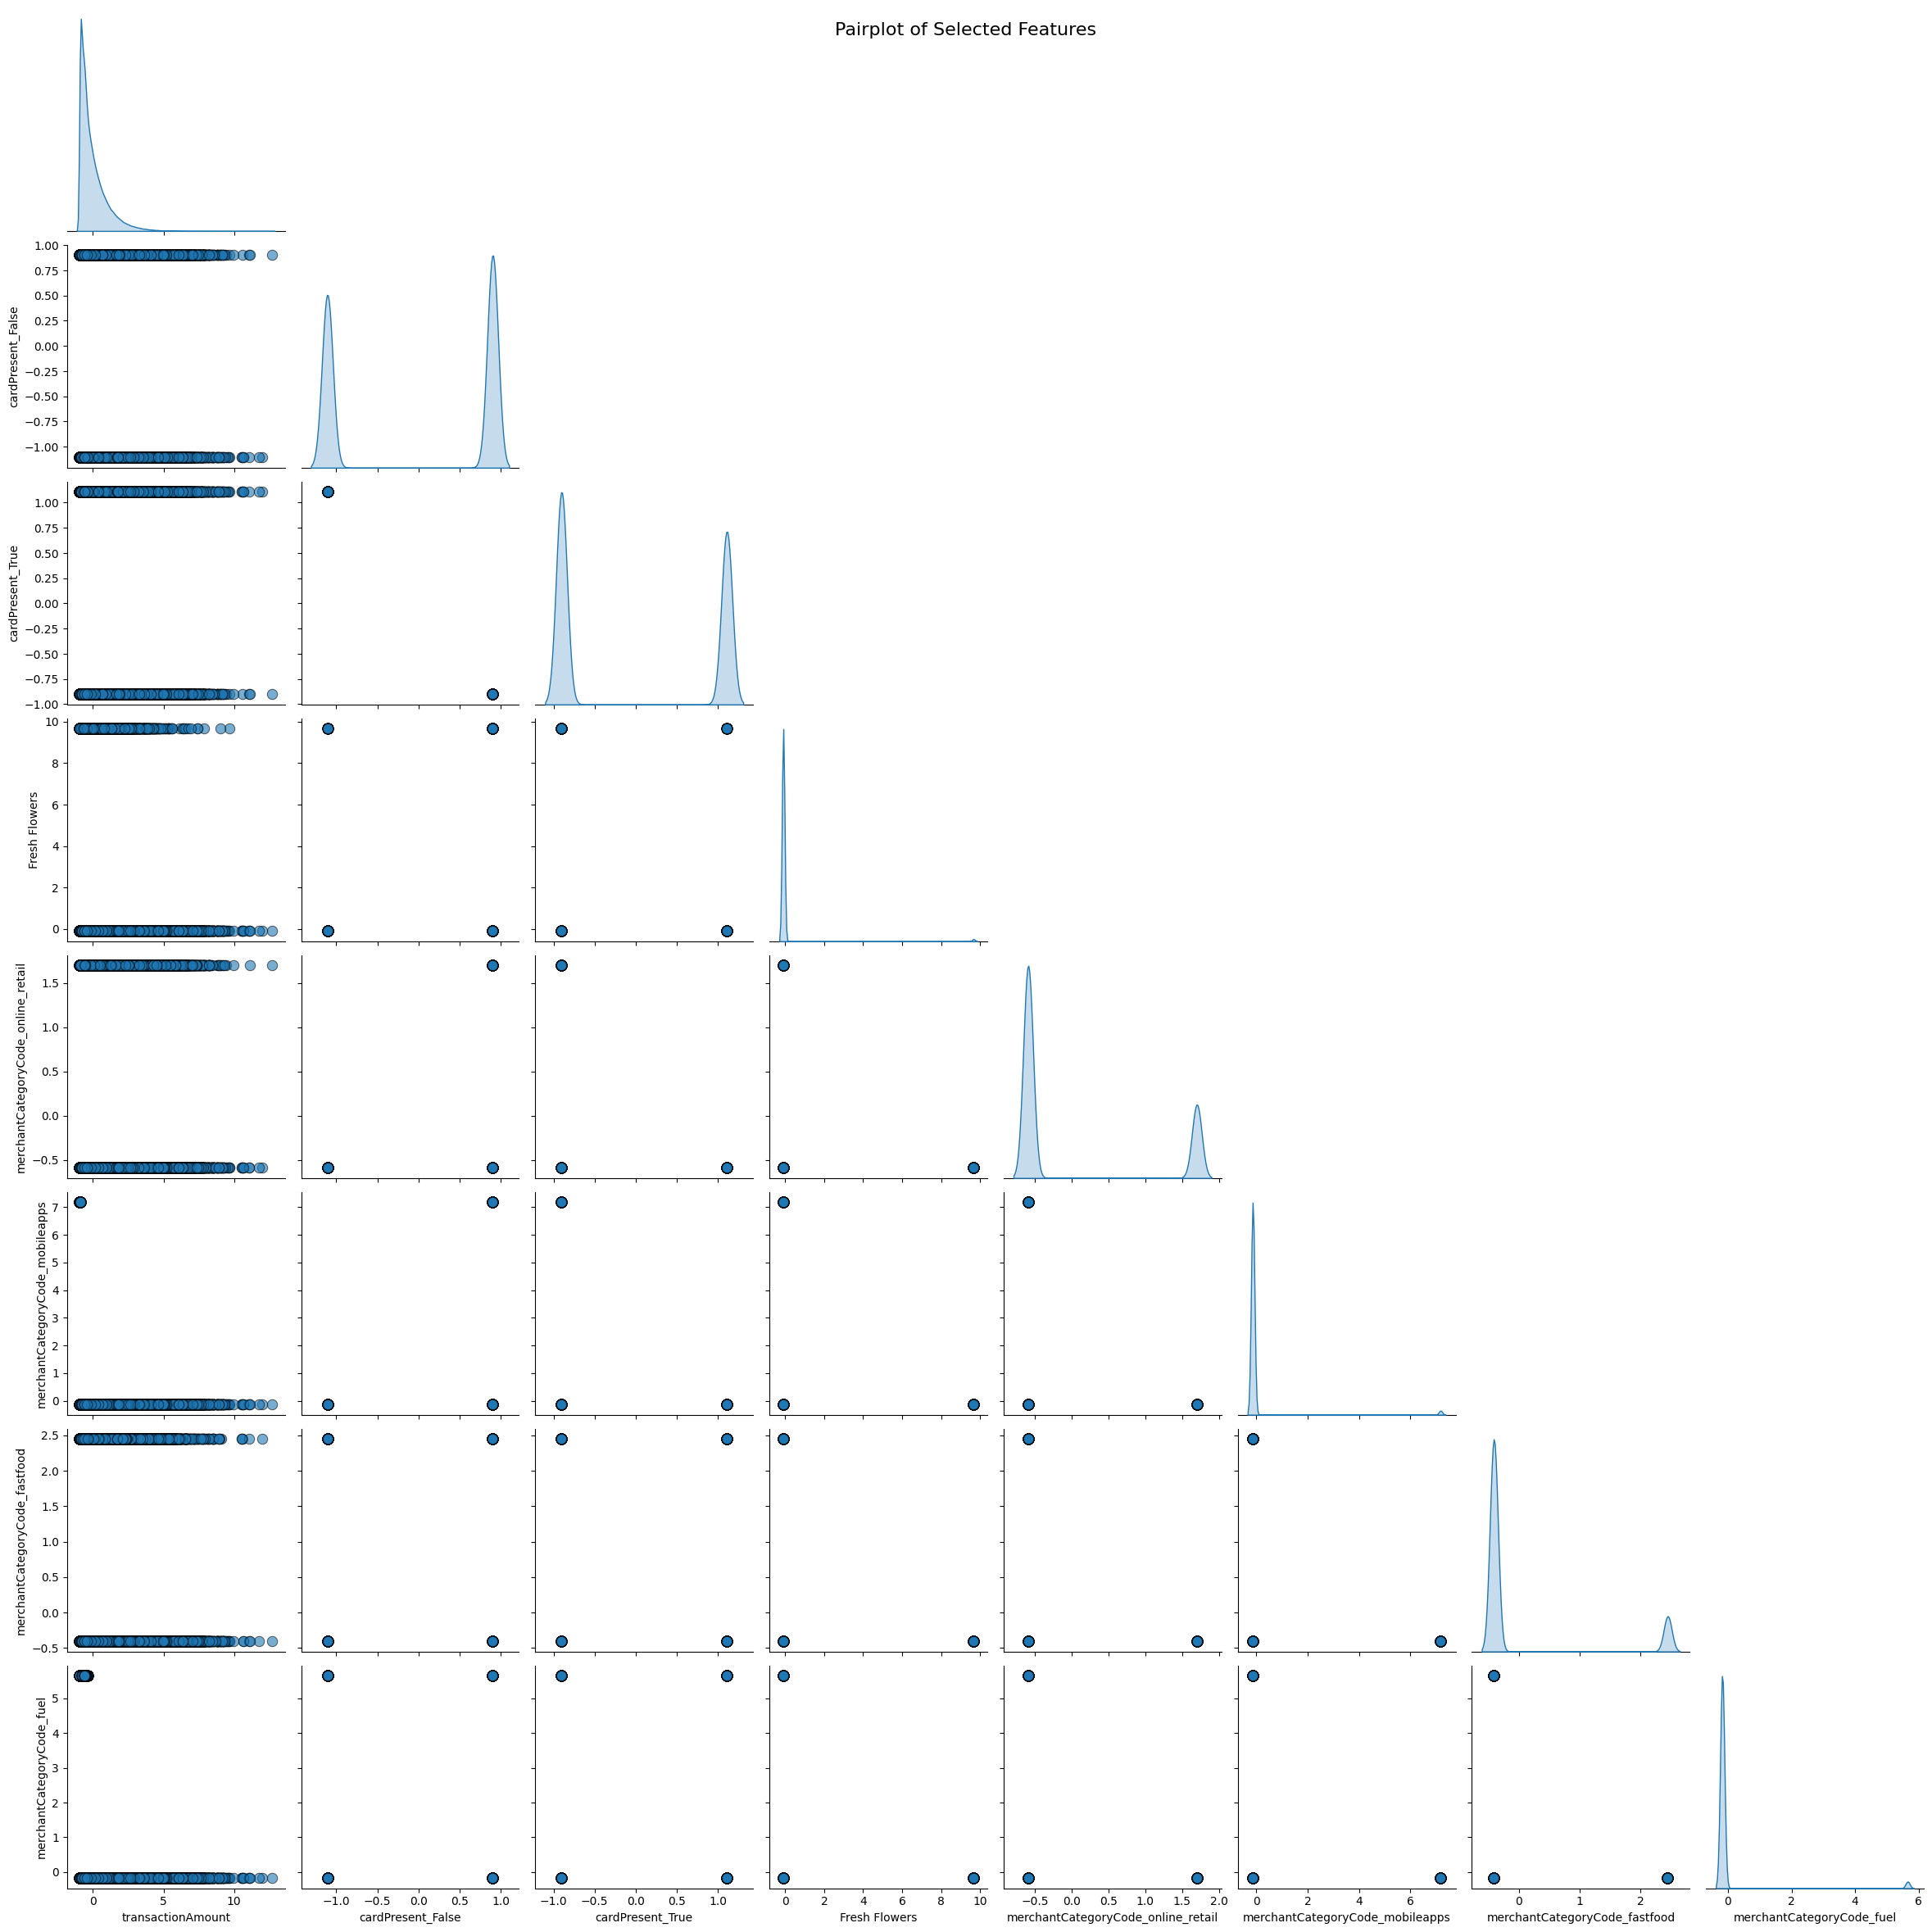

In [ ]:
# Creando el pairplot
sns.pairplot(df[columns], corner=True, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=3)
plt.suptitle('Pairplot of Selected Features', size=16)
plt.show()